In [10]:
!pip install praw


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 2.9 MB/s eta 0:00:00a 0:00:01


In [12]:
import praw

# Dina API-nycklar från Reddit applikationen
client_id = 'AfFLrp4nm1wyvLqfzYeo2g'
client_secret = 'gQ4DQ3c_9W0QWNMfht8ZQD-A4aRizA'
user_agent = 'script:project1:v1.0 (by u/No-Figure6533)'

# Skapa en Reddit-instans
reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     user_agent=user_agent)

# Välj subreddit och antal inlägg att hämta
subreddit_name = 'developer'  # Exempel subreddit
limit = 10  # Antal inlägg att hämta

# Hämta inläggen
subreddit = reddit.subreddit(subreddit_name)
for post in subreddit.new(limit=limit):
    print(f'Title: {post.title}\nUpvotes: {post.score}\n')


Title: Python Coding Concepts
Upvotes: 1

Title: Working on a generative art web application. Would appreciate some feedback
Upvotes: 2

Title: Looking for mentor who codes
Upvotes: 1

Title: International Developers needed for a project in Ukraine to assist with the humanitarian war effort in this country
Upvotes: 2

Title: Infinity Cosmos - A little space game
Upvotes: 0

Title: Remote - relocation
Upvotes: 1

Title: As a mod, I would love to get to know the community more, what got you into development?
Upvotes: 2

Title: Why going stateless is key for authorization systems
Upvotes: 1

Title: Quick PHP Quiz For Freshers: 20 Questions
Upvotes: 1

Title: Matrix Bridge Bounties
Upvotes: 1



In [13]:
!pip install pandas matplotlib seaborn nltk textblob praw


In [14]:
import nltk
nltk.download('vader_lexicon')



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/miladdolmaeh/nltk_data...


True

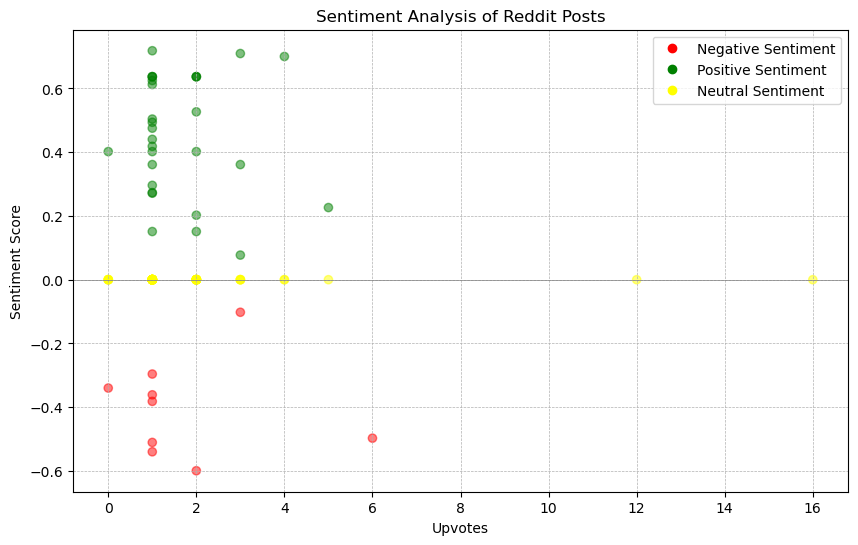

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import praw
import numpy as np

# Konfigurera sentimentanalysatorn
sia = SentimentIntensityAnalyzer()

# Dina API-uppgifter från Reddit
client_id = 'AfFLrp4nm1wyvLqfzYeo2g'
client_secret = 'gQ4DQ3c_9W0QWNMfht8ZQD-A4aRizA'
user_agent = 'script:project1:v1.0 (by u/No-Figure6533)'

# Skapa en Reddit-instans
reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     user_agent=user_agent)

# Välj subreddit och antal inlägg att hämta
subreddit_name = 'developer'
limit = 100

# Samla in data
posts_data = []
subreddit = reddit.subreddit(subreddit_name)
for post in subreddit.hot(limit=limit):
    sentiment_score = sia.polarity_scores(post.title)['compound']
    posts_data.append([post.title, post.score, sentiment_score])

# Skapa en DataFrame
df = pd.DataFrame(posts_data, columns=['title', 'upvotes', 'sentiment'])

# Spara data till en CSV-fil
df.to_csv('reddit_posts.csv')

# Definiera färger baserade på sentimentvärden
conditions = [
    (df['sentiment'] < -0.05),
    (df['sentiment'] > 0.05),
    (df['sentiment'] >= -0.05) & (df['sentiment'] <= 0.05)
]
choices = ['red', 'green', 'yellow']
df['color'] = np.select(conditions, choices, default='black')

# Plotta diagrammet
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['upvotes'], df['sentiment'], c=df['color'], alpha=0.5)

# Skapa en anpassad legend
legend_labels = {'red': 'Negative Sentiment', 'green': 'Positive Sentiment', 'yellow': 'Neutral Sentiment'}
markers = [plt.Line2D([0,0],[0,0], color=color, marker='o', linestyle='') for color in legend_labels.keys()]
plt.legend(markers, legend_labels.values(), numpoints=1)

plt.title('Sentiment Analysis of Reddit Posts')
plt.xlabel('Upvotes')
plt.ylabel('Sentiment Score')
plt.axhline(0, color='grey', linewidth=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()



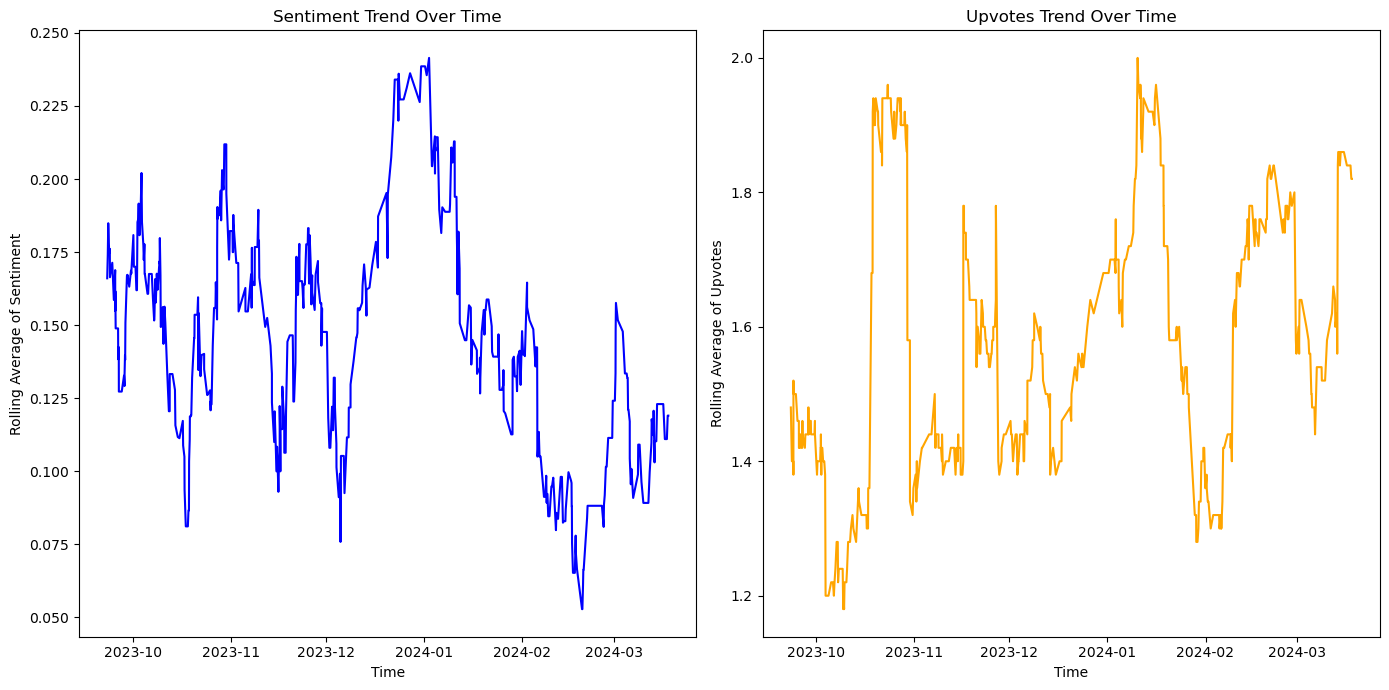

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import praw
import numpy as np

# Konfigurera sentimentanalysatorn
sia = SentimentIntensityAnalyzer()

# Dina API-uppgifter från Reddit
client_id = 'AfFLrp4nm1wyvLqfzYeo2g'
client_secret = 'gQ4DQ3c_9W0QWNMfht8ZQD-A4aRizA'
user_agent = 'script:project1:v1.0 (by u/No-Figure6533)'

# Skapa en Reddit-instans
reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     user_agent=user_agent)

# Välj subreddit och antal inlägg att hämta
subreddit_name = 'developer'
limit = 1000

# Samla in data
posts_data = []
subreddit = reddit.subreddit(subreddit_name)
for post in subreddit.hot(limit=limit):
    created_time = pd.to_datetime(post.created_utc, unit='s')
    sentiment_score = sia.polarity_scores(post.title)['compound']
    posts_data.append([post.title, post.score, sentiment_score, created_time])

# Skapa en DataFrame
df = pd.DataFrame(posts_data, columns=['title', 'upvotes', 'sentiment', 'created_time'])

# Sortera data efter skapad tid
df.sort_values(by='created_time', inplace=True)

# Skapa rullande medelvärden för sentiment och upvotes för att identifiera trender
df['sentiment_rolling'] = df['sentiment'].rolling(window=50).mean()
df['upvotes_rolling'] = df['upvotes'].rolling(window=50).mean()

# Plotta trenderna över tid
plt.figure(figsize=(14, 7))

# Första subplot för sentiment trend
plt.subplot(1, 2, 1)
plt.plot(df['created_time'], df['sentiment_rolling'], color='blue')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Time')
plt.ylabel('Rolling Average of Sentiment')

# Andra subplot för upvotes trend
plt.subplot(1, 2, 2)
plt.plot(df['created_time'], df['upvotes_rolling'], color='orange')
plt.title('Upvotes Trend Over Time')
plt.xlabel('Time')
plt.ylabel('Rolling Average of Upvotes')

plt.tight_layout()
plt.show()


In [25]:
from collections import Counter
import praw
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ladda ner stopwords från NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Skapa en Reddit-instans (använd dina egna uppgifter)
reddit = praw.Reddit(client_id='AfFLrp4nm1wyvLqfzYeo2g',
                     client_secret='gQ4DQ3c_9W0QWNMfht8ZQD-A4aRizA',
                     user_agent='script:project1:v1.0 (by u/No-Figure6533)')

# Välj subreddit
subreddit_name = 'developer'
subreddit = reddit.subreddit(subreddit_name)

# Samla in titlar från de senaste inläggen
titles = [post.title for post in subreddit.new(limit=500)]

# Tokenisera titlarna och rensa bort stoppord och specialtecken
words = []
stop_words = set(stopwords.words('english'))
for title in titles:
    # Tokenisera varje titel
    tokens = word_tokenize(title)
    # Rensa bort stoppord och specialtecken
    words.extend([word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words])

# Räkna förekomsten av varje ord
word_freq = Counter(words)

# Ta ut de mest vanliga orden
common_words = word_freq.most_common(10)

print(common_words)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/miladdolmaeh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/miladdolmaeh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('development', 45), ('developer', 37), ('help', 33), ('web', 32), ('know', 27), ('app', 25), ('would', 22), ('developers', 22), ('get', 22), ('need', 21)]


In [9]:
# Running a simplified MapReduce program.
import praw

def fetch_posts(subreddit_name, limit):
    
    reddit = praw.Reddit(client_id='AfFLrp4nm1wyvLqfzYeo2g',
                         client_secret='gQ4DQ3c_9W0QWNMfht8ZQD-A4aRizA',
                         user_agent='script:project1:v1.0 (by u/No-Figure6533')

    # Fetch posts from the specified subreddit
    subreddit = reddit.subreddit(subreddit_name)
    posts = []
    for post in subreddit.hot(limit=limit):
        posts.append(post)
    return posts


subreddit_name = 'developer'  # Specify the subreddit name
limit = 25  # Specify the number of posts to retrieve
posts = fetch_posts(subreddit_name, limit)


In [4]:
import praw

def fetch_posts(subreddit_name, limit):
  
    reddit = praw.Reddit(client_id='AfFLrp4nm1wyvLqfzYeo2g',
                         client_secret='gQ4DQ3c_9W0QWNMfht8ZQD-A4aRizA',
                         user_agent='script:project1:v1.0 (by u/No-Figure6533)')

   
    subreddit = reddit.subreddit(subreddit_name)
    posts = []
    for post in subreddit.hot(limit=limit):
        posts.append(post)
        print(post.title)  # Print the title of each post
    return posts

subreddit_name = 'developer'  
limit = 30  # Specify the number of posts to retrieve
posts = fetch_posts(subreddit_name, limit)


Mantis Vue Admin Dashboard
Tl;dr - what or who do you want to see at a fintech developer conference?
App monetization aside from ads. 
What makes a great business analyst to you?
What should I do when I'm 100% blocked at work? I'm waiting for my boss to create an account, that I can't create because I need the company's debit card. Until I have the account, I can't continue. I think he's just busy. I called, texted and messaged him on Slack.
Python Coding Concepts
Working on a generative art web application. Would appreciate some feedback
Looking for mentor who codes
International Developers needed for a project in Ukraine to assist with the humanitarian war effort in this country
Infinity Cosmos - A little space game
Remote - relocation
As a mod, I would love to get to know the community more, what got you into development?
Why going stateless is key for authorization systems
Implementing a Production-Ready CRUD REST API with Winglang: A TypeScript Dialect
Quick PHP Quiz For Freshers:

In [6]:
import praw

def fetch_posts(subreddit_name, limit):
    # Initialize Reddit instance
    reddit = praw.Reddit(client_id='AfFLrp4nm1wyvLqfzYeo2g',
                         client_secret='gQ4DQ3c_9W0QWNMfht8ZQD-A4aRizA',
                         user_agent='script:project1:v1.0 (by u/No-Figure6533)')

    # Fetch posts from the specified subreddit
    subreddit = reddit.subreddit(subreddit_name)
    posts = []
    for post in subreddit.hot(limit=limit):
        yield (subreddit_name, post.title)  # Emit key-value pair
    return posts

# Example usage
subreddit_name = 'developer'  # Specify the subreddit name
limit = 30  # Specify the number of posts to retrieve

# Map phase
mapped_data = fetch_posts(subreddit_name, limit)

# Shuffle and sort phase (assuming it's handled by the MapReduce framework)

# Reduce phase (optional, depending on the analysis you want to perform)
# In this example, we're simply printing the results
for subreddit, post_title in mapped_data:
    print(f"Subreddit: {subreddit}, Post Title: {post_title}")


Subreddit: developer, Post Title: Mantis Vue Admin Dashboard
Subreddit: developer, Post Title: Tl;dr - what or who do you want to see at a fintech developer conference?
Subreddit: developer, Post Title: App monetization aside from ads. 
Subreddit: developer, Post Title: What makes a great business analyst to you?
Subreddit: developer, Post Title: What should I do when I'm 100% blocked at work? I'm waiting for my boss to create an account, that I can't create because I need the company's debit card. Until I have the account, I can't continue. I think he's just busy. I called, texted and messaged him on Slack.
Subreddit: developer, Post Title: Python Coding Concepts
Subreddit: developer, Post Title: Working on a generative art web application. Would appreciate some feedback
Subreddit: developer, Post Title: Looking for mentor who codes
Subreddit: developer, Post Title: International Developers needed for a project in Ukraine to assist with the humanitarian war effort in this country
Subr

In [8]:
import praw

def fetch_posts(subreddit_name, limit):
    # Initialize Reddit instance
    reddit = praw.Reddit(client_id='AfFLrp4nm1wyvLqfzYeo2g',
                         client_secret='gQ4DQ3c_9W0QWNMfht8ZQD-A4aRizA',
                         user_agent='script:project1:v1.0 (by u/No-Figure6533)')

    # Fetch posts from the specified subreddit
    subreddit = reddit.subreddit(subreddit_name)
    posts = []
    for post in subreddit.hot(limit=limit):
        yield (subreddit_name, post.title)  # Emit key-value pair

def shuffle_and_sort(mapped_data):
    # This function sorts the mapped data by key (subreddit_name)
    # It's assumed that the MapReduce framework handles this step
    sorted_data = sorted(mapped_data, key=lambda x: x[0])
    return sorted_data

def reducer(sorted_data):
    # This function reduces the sorted data by combining values with the same key
    # In this example, we're just printing the results
    current_key = None
    current_values = []
    for key, value in sorted_data:
        if key != current_key:
            if current_key is not None:
                print(f"Subreddit: {current_key}, Posts: {', '.join(current_values)}")
            current_key = key
            current_values = [value]
        else:
            current_values.append(value)
    if current_key is not None:
        print(f"Subreddit: {current_key}, Posts: {', '.join(current_values)}")


subreddit_name = 'developer'  # Specify the subreddit name
limit = 30  # Specify the number of posts to retrieve

# Map phase
mapped_data = fetch_posts(subreddit_name, limit)

# Shuffle and sort phase (assumed to be handled by the MapReduce framework)
sorted_data = shuffle_and_sort(mapped_data)

# Reduce phase
reducer(sorted_data)


Subreddit: developer, Posts: Mantis Vue Admin Dashboard, Tl;dr - what or who do you want to see at a fintech developer conference?, App monetization aside from ads. , What makes a great business analyst to you?, What should I do when I'm 100% blocked at work? I'm waiting for my boss to create an account, that I can't create because I need the company's debit card. Until I have the account, I can't continue. I think he's just busy. I called, texted and messaged him on Slack., Python Coding Concepts, Working on a generative art web application. Would appreciate some feedback, Looking for mentor who codes, International Developers needed for a project in Ukraine to assist with the humanitarian war effort in this country, Infinity Cosmos - A little space game, Remote - relocation, As a mod, I would love to get to know the community more, what got you into development?, Why going stateless is key for authorization systems, Implementing a Production-Ready CRUD REST API with Winglang: A TypeS

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


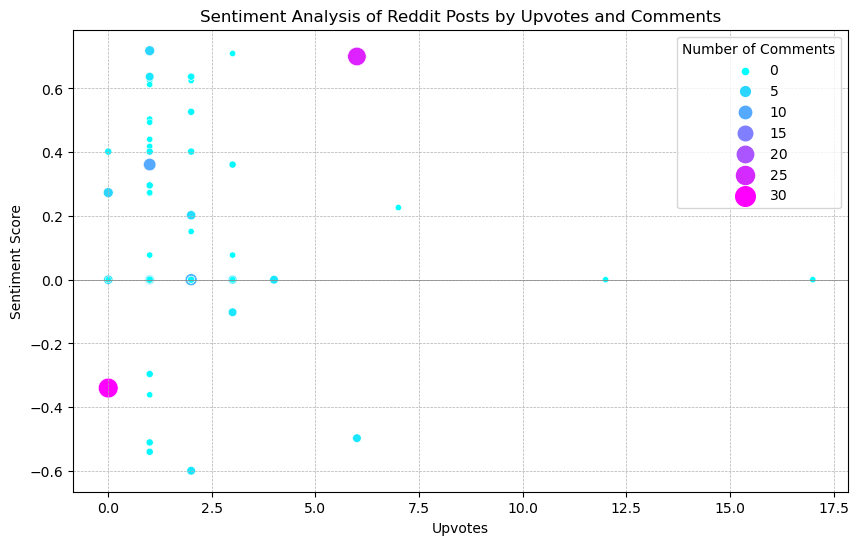

In [10]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np
import nltk
from collections import Counter


reddit = praw.Reddit(client_id='AfFLrp4nm1wyvLqfzYeo2g',
                     client_secret='gQ4DQ3c_9W0QWNMfht8ZQD-A4aRizA',
                     user_agent='script:project1:v1.0 (by u/No-Figure6533)')

subreddit_name = 'developer'
limit = 100

# Sentiment Analysis Setup
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Data Collection
posts_data = []
subreddit = reddit.subreddit(subreddit_name)
for post in subreddit.hot(limit=limit):
    sentiment_score = sia.polarity_scores(post.title)['compound']
    posts_data.append([post.title, post.score, sentiment_score, post.num_comments])  # Include number of comments

# DataFrame Creation
df = pd.DataFrame(posts_data, columns=['title', 'upvotes', 'sentiment', 'comments'])

# Data Visualization - Sentiment vs. Upvotes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='upvotes', y='sentiment', hue='comments', palette='cool', size='comments', sizes=(20, 200))
plt.title('Sentiment Analysis of Reddit Posts by Upvotes and Comments')
plt.xlabel('Upvotes')
plt.ylabel('Sentiment Score')
plt.axhline(0, color='grey', linewidth=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Number of Comments')
plt.show()



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Subreddit: developer, Average Sentiment: 0.11
Top 7 most common words: [('development', 9), ('web', 6), ('developers', 6), ('python', 5), ('would', 5), ('know', 5), ('like', 5)]


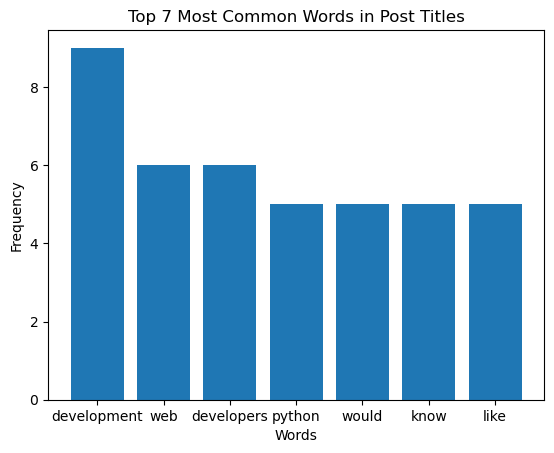

In [14]:
# incorporate analysis into this simplified MapReduce program


import praw
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Ensure that NLTK's components are downloaded
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Initialize Reddit instance with your own credentials
reddit = praw.Reddit(
    client_id='AfFLrp4nm1wyvLqfzYeo2g',
    client_secret='gQ4DQ3c_9W0QWNMfht8ZQD-A4aRizA',
    user_agent='script:project1:v1.0 (by u/No-Figure6533)'
)

# Define a function to fetch posts and perform sentiment analysis
def fetch_posts(subreddit_name, limit):
    subreddit = reddit.subreddit(subreddit_name)
    for post in subreddit.hot(limit=limit):
        title = post.title
        sentiment_score = sia.polarity_scores(title)['compound']
        yield (subreddit_name, (title, sentiment_score))

# Define a function to shuffle and sort the data (if needed)
def shuffle_and_sort(mapped_data):
    # Normally, the MapReduce framework handles this step
    # Here, we simply convert it to a list and sort it
    return sorted(list(mapped_data), key=lambda x: x[0])

# Define the reduce function to aggregate sentiment scores and perform word frequency analysis
def reducer(sorted_data):
    aggregated_sentiment = {}
    word_freq = Counter()
    stop_words = set(stopwords.words('english'))
    
    for subreddit, values in sorted_data:
        title, sentiment_score = values
        aggregated_sentiment[subreddit] = aggregated_sentiment.get(subreddit, [])
        aggregated_sentiment[subreddit].append(sentiment_score)
        
        # Tokenize and update word frequency
        words = word_tokenize(title)
        words_filtered = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
        word_freq.update(words_filtered)

    # Calculate average sentiment for each subreddit
    for subreddit, scores in aggregated_sentiment.items():
        avg_sentiment = sum(scores) / len(scores)
        print(f"Subreddit: {subreddit}, Average Sentiment: {avg_sentiment:.2f}")
    
    # Get the top 7 most common words across all posts
    common_words = word_freq.most_common(7)
    print("Top 7 most common words:", common_words)

    # Plotting the word frequencies
    words, counts = zip(*common_words)
    plt.bar(words, counts)
    plt.title('Top 7 Most Common Words in Post Titles')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

    return aggregated_sentiment, word_freq

# Specify the subreddit name and limit
subreddit_name = 'developer'
limit = 100

# Execute the MapReduce process
mapped_data = fetch_posts(subreddit_name, limit)
sorted_data = shuffle_and_sort(mapped_data)
aggregated_sentiment, word_freq = reducer(sorted_data)
